Number of components to retain at least 95% variance: 14


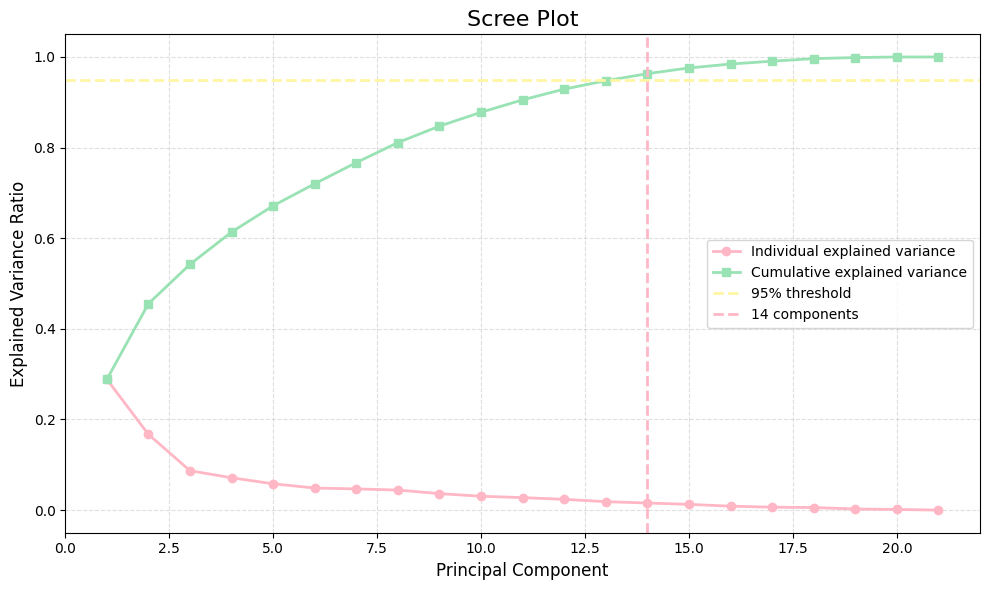

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("fetal_health.csv")  # Adjust the path if needed

# Drop the target column
X = df.drop(columns=["fetal_health"])

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Determine the number of components for 95% variance
n_components_95 = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative >= 0.95) + 1
print(f"Number of components to retain at least 95% variance: {n_components_95}")

# Plot the Scree Plot with soft baby colors
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o',
         color='#ffb7c5', label='Individual explained variance', linewidth=2)  # Baby pink
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s',
         color='#99e2b4', label='Cumulative explained variance', linewidth=2)  # Soft teal
plt.axhline(y=0.95, color='#fff6a3', linestyle='--', linewidth=2, label='95% threshold')  # Baby yellow
plt.axvline(x=n_components_95, color='#ffb7c5', linestyle='--', linewidth=2,
            label=f'{n_components_95} components')  # Pink for vertical line

plt.title('Scree Plot', fontsize=16)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()
